In [7]:
import pandas as pd
import numpy as np

In [79]:
data = pd.read_csv("driver-data.csv", index_col="id")
data.head()

,mean_dist_day,mean_over_speed_perc
id,,
3423311935,71.24,28
3423313212,52.53,25
3423313724,64.54,27
3423311373,55.69,22
3423310999,54.58,25


In [80]:
data['profit'] = np.random.randint(6,20, size=len(data))

In [82]:
x = data.iloc[:, [0,1,2]].values
print(x)

[[ 71.24  28.    17.  ]
 [ 52.53  25.    17.  ]
 [ 64.54  27.     6.  ]
 ...
 [170.91  12.    10.  ]
 [176.14   5.    14.  ]
 [168.03   9.     7.  ]]


In [83]:
from sklearn.cluster import KMeans

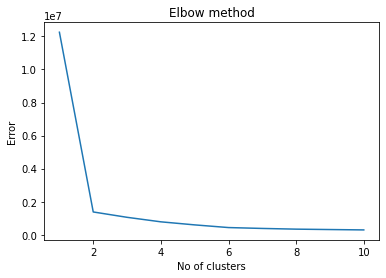

In [84]:
#To check optimum number of clusters
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [85]:
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(x)

In [87]:
unique, counts = np.unique(labels, return_counts=True)

dict_data = dict(zip(unique, counts))
dict_data

{0: 2776, 1: 696, 2: 424, 3: 104}

In [89]:
data["cluster"] = labels
print(data)

            mean_dist_day  mean_over_speed_perc  profit  cluster
id                                                              
3423311935          71.24                    28      17        2
3423313212          52.53                    25      17        2
3423313724          64.54                    27       6        2
3423311373          55.69                    22      15        2
3423310999          54.58                    25       8        2
...                   ...                   ...     ...      ...
3423310685         160.04                    10      15        1
3423312600         176.17                     5      12        1
3423312921         170.91                    12      10        1
3423313630         176.14                     5      14        1
3423311533         168.03                     9       7        1

[4000 rows x 4 columns]


C:\Users\yubhav\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


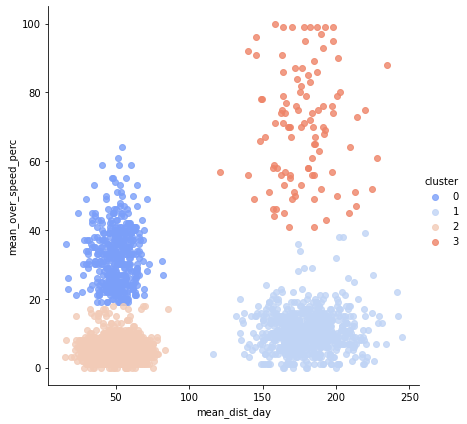

In [61]:
import seaborn as sns
sns.lmplot('mean_dist_day', 'mean_over_speed_perc', data=data, hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)

In [103]:
#For normalising
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

data2 = data
# print(data2)

scaler = StandardScaler()
scaler.fit(data2.drop('cluster',axis=1))
scaled_features = scaler.transform(data2.drop('cluster',axis=1))

df_feat = pd.DataFrame(scaled_features,columns=data2.columns[:-1])
df_feat.head()

,mean_dist_day,mean_over_speed_perc,profit
0,-0.089810,1.260613,1.150202
1,-0.439773,1.041744,1.150202
2,-0.215131,1.187656,-1.593868
3,-0.380666,0.822875,0.651280
4,-0.401428,1.041744,-1.094946


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,data2['cluster'],test_size=0.30)

Text(0, 0.5, 'Accuracy Rate')

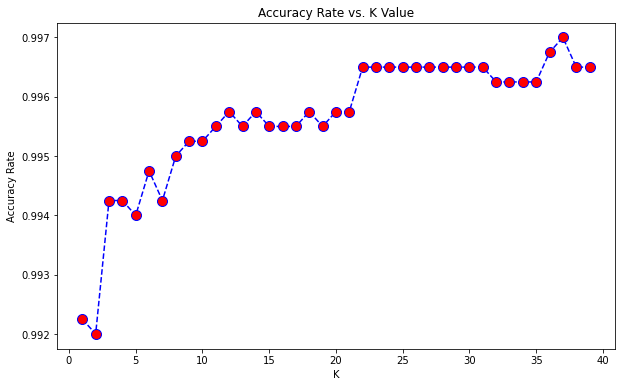

In [99]:
#To check optimum number of k neighbours
from sklearn.model_selection import cross_val_score
accuracy_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,data2['cluster'],cv=10)
    accuracy_rate.append(score.mean())
    
plt.figure(figsize=(10,6))

plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [100]:
#As from above plot we can see the accuracy rate is stable when k=17
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [101]:
#Classification Report
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[823   0   2   0]
 [  0 226   0   0]
 [  0   0 124   0]
 [  0   0   0  25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       825
           1       1.00      1.00      1.00       226
           2       0.98      1.00      0.99       124
           3       1.00      1.00      1.00        25

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200

